In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import accuracy_score
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

In [106]:
# Carregar os dados do arquivo Excel
file_path = r'G:\Meu Drive\MESTRADO - MLOG\Projeto EV-Explore Ambev\TESTE_MAP_MATCHING_25_04\ENERGIA_v3.xlsx'
data = pd.read_excel(file_path)

In [107]:
data

,ID_Rota,E_cinetica,E_gravit,E_atrito,E_res_ar,E_Regen_Lin,E_Regen_Exp,ENERGIA EST. (%),ENERGIA EST. REG. LIN. (%),ENERGIA EST. REG. EXP. (%),TBGREEN (%)
0,20230901_RHQ2H04,0.199537,0.098231,0.195568,0.051162,-0.040010,-0.043564,0.544498,0.504488,0.500934,0.412
1,20230902_RHS6B08,0.185326,0.111138,0.248889,0.070658,-0.043772,-0.047662,0.616011,0.572240,0.568350,0.416
2,20230902_RHS6F90,0.207013,0.219680,0.221214,0.058543,-0.045707,-0.049484,0.706450,0.660743,0.656966,0.464
3,20230902_RHT4G96,0.194500,0.101624,0.222006,0.072888,-0.043379,-0.047387,0.591018,0.547639,0.543631,0.380
4,20230904_RHQ2H05,0.258944,0.334974,0.262168,0.052849,-0.057489,-0.062224,0.908935,0.851446,0.846711,0.524
...,...,...,...,...,...,...,...,...,...,...,...
172,20240215_RHS6B06,0.166173,0.125845,0.214158,0.056880,-0.028350,-0.030652,0.563055,0.534705,0.532403,0.368
173,20240220_RHS6F91,0.166800,0.090850,0.246604,0.061937,-0.033697,-0.037042,0.566190,0.532493,0.529148,0.372
174,20240222_RHQ2H03,0.191980,0.162978,0.241654,0.072461,-0.043122,-0.047185,0.669073,0.625951,0.621888,0.532
175,20240226_RHS6F92,0.219499,0.170535,0.301118,0.068606,-0.042007,-0.045774,0.759758,0.717750,0.713983,0.444


In [108]:
X = data[['E_cinetica', 'E_gravit', 'E_atrito', 'E_res_ar','E_Regen_Lin']]
y = data['TBGREEN (%)']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=697)

In [110]:
model = Sequential([
    Input(shape=(5,)),
    Dense(64, activation='relu'),  
    Dense(128, activation='relu'),                    
    Dense(64, activation='relu'),                    
    Dense(1, activation='linear')                  
])

In [111]:
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='mean_squared_error')

In [112]:
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1) 

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2172
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2139 
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2140
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2103  
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2112 
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2107 
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2007 
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1875  
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1930 
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1842 
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1821 
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1802  
Epoch 13/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1726  
Epoch 14/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1745 
Epoch 15/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1736 
Epoch 16/200
9/9 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0245 
Epoch 83/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0225
Epoch 84/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0230  
Epoch 85/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0204 
Epoch 86/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186 
Epoch 87/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0187 
Epoch 88/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 
Epoch 89/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 
Epoch 90/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0157 
Epoch 91/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0136 
Epoch 92/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158 
Epoch 93/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126 
Epoch 94/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129 
Epoch 95/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0142 
Epoch 96/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108 
Epoch 97/200
9/9 ━━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 
Epoch 164/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 
Epoch 165/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 
Epoch 166/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 
Epoch 167/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 
Epoch 168/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 
Epoch 169/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 
Epoch 170/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 
Epoch 171/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 
Epoch 172/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 
Epoch 173/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 
Epoch 174/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 
Epoch 175/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 
Epoch 176/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 
Epoch 177/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 
Epoch 178

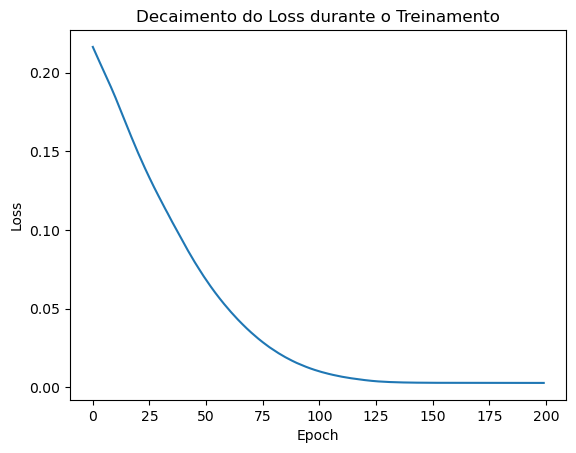

In [113]:
# Plotar o decaimento do loss ao longo das epochs
plt.plot(history.history['loss'])
plt.title('Decaimento do Loss durante o Treinamento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [115]:
loss = model.evaluate(X_test, y_test)
loss

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 


0.001742975553497672

In [116]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [117]:
predictions

array([[0.5258591 ],
       [0.38192308],
       [0.44711003],
       [0.53457046],
       [0.4144475 ],
       [0.5664591 ],
       [0.43942901],
       [0.4082264 ],
       [0.46356124],
       [0.567603  ],
       [0.49781975],
       [0.53076166],
       [0.5148543 ],
       [0.4947282 ],
       [0.57537925],
       [0.45218107],
       [0.5047421 ],
       [0.5413159 ],
       [0.44764704],
       [0.51268697],
       [0.4078628 ],
       [0.64384055],
       [0.43168584],
       [0.48239806],
       [0.45268303],
       [0.33534786],
       [0.54106164],
       [0.4097895 ],
       [0.41370684],
       [0.4080375 ],
       [0.51943135],
       [0.33525828],
       [0.5980544 ],
       [0.3927004 ],
       [0.46198165],
       [0.5168623 ]], dtype=float32)

In [118]:
y_pred = pd.DataFrame(predictions)
y_test = pd.DataFrame(y_test)

In [119]:
y_pred.index = y_test.index

In [120]:
df_combined = pd.concat([y_pred,y_test], axis=1)
df_combined.columns = ['y_pred', 'y_test']

In [121]:
df_combined['dif'] = (df_combined['y_pred'] - df_combined['y_test'])*100

In [122]:
df_combined.head(1)

,y_pred,y_test,dif
115,0.525859,0.476,4.985912


In [123]:
mse = mean_squared_error(df_combined['y_pred']*100, df_combined['y_test']*100)

print("Mean Squared Error (MSE) da coluna 'diferenca':", mse)

r2 = r2_score(df_combined['y_test'], df_combined['y_pred'])

print('R² = ', r2)

Mean Squared Error (MSE) da coluna 'diferenca': 17.429753013085936
R² =  0.741940967365496


In [124]:
df_combined

,y_pred,y_test,dif
115,0.525859,0.476,4.985912
73,0.381923,0.400,-1.807692
122,0.447110,0.432,1.511003
50,0.534570,0.588,-5.342954
149,0.414447,0.408,0.644749
33,0.566459,0.648,-8.154088
165,0.439429,0.508,-6.857099
172,0.408226,0.368,4.022640
133,0.463561,0.444,1.956124
31,0.567603,0.608,-4.039701


In [125]:
model.save('Modelo_Energia_RNA_Final_Regen_Lin.keras')